In [ ]:
import os
from tqdm.notebook import tqdm

In [ ]:
# Set your image folder path
image_folder = "/home/iot/SRGAN_implementation/samples/high_res_image"

# Get list of image files (you can adjust the extensions as necessary)
image_extensions = (".jpg", ".jpeg", ".png")
files = [f for f in os.listdir(image_folder) if f.lower().endswith(image_extensions)]

# Rename images
for idx, filename in enumerate(tqdm(files, desc="Renaming images"), start=1):
    # Split the filename and extension
    name, ext = os.path.splitext(filename)
    new_name = f"image_{idx}{ext}"
    src = os.path.join(image_folder, filename)
    dst = os.path.join(image_folder, new_name)
    os.rename(src, dst)

print("Renaming complete!")

In [ ]:
from torchvision import models

model = models.vgg19(pretrained=True).features
model.eval()

In [ ]:
from utils.prepare_dataset import PairedDataset
from torchvision.transforms import ToPILImage
from torch.utils.data import DataLoader
from IPython.display import display

hr_dir = "/home/iot/SRGAN_implementation/data/High_Res_Images"  # Adjust to your HR images folder
batch_size = 16
num_workers = 4

dataset = PairedDataset(hr_dir)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers)
    
for batch in dataloader:
    for pair in batch:
        hr = pair[0]
        lr = pair[1]
        print(pair)
        # hr = ToPILImage()(hr)
        # lr = ToPILImage()(lr)
        # print("High resolution image:")
        # display(hr)
        # print("Low resolution image:")
        # display(lr)
        break

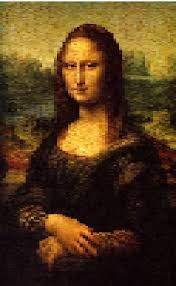

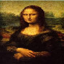

In [6]:
from PIL import Image
from IPython.display import display

img_path = "test_images/monalisa.jpeg"

img = Image.open(img_path)
img_resized = img.resize((64, 64), Image.BICUBIC)

display(img)
display(img_resized)

img_resized.save("test_images/monalisa_64x64.jpeg")
